#### Best Practice

Be sure to set up a virtual environment as there were lots of imports in this project
| Command | Linux/Mac | GitBash |
| ------- | --------- | ------- |
| Create  | python3 -m venv venv | python -m venv venv |
| Activate | source venv/bin/activate | source venv/Scripts/activate |
| Install | pip install -r requirements.txt or pip install packages | pip install -r requirements.txt or pip install packages|
| Deactivate | deactivate | deactivate |

In [24]:
import pandas as pd
# import openpyxl
from Carmen_WORCEmployment import load_and_clean


# sys.path.append(os.path.abspath(".."))
file_path = "../../data/WORC Employment.xlsx"
worc = pd.read_excel(file_path)



In [25]:
worc = load_and_clean(worc)
worc





ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [3]:
worc_clean.tail()

NameError: name 'worc_clean' is not defined

## Plots
1. Average Salary by Region, Gender, Race

2. Placement Type Distribution

3. Program Participation Trends

4. Start Dates Timeline

5. Salary Distributions

6. Job Titles or Companies by Region

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
print(worc_clean.describe(include='all'))
print(worc_clean['ATP Placement Type'].value_counts())


            Auto Id  Full Name           Email     EnrollmentId  \
count            25         25              25               25   
unique           25          1               1               25   
top     202203-7853  name name  name@gmail.com  Enrollment-6442   
freq              1         25              25                1   
mean            NaN        NaN             NaN              NaN   
min             NaN        NaN             NaN              NaN   
25%             NaN        NaN             NaN              NaN   
50%             NaN        NaN             NaN              NaN   
75%             NaN        NaN             NaN              NaN   
max             NaN        NaN             NaN              NaN   
std             NaN        NaN             NaN              NaN   

                           Company Name                        Job Title  \
count                                25                               25   
unique                               25    

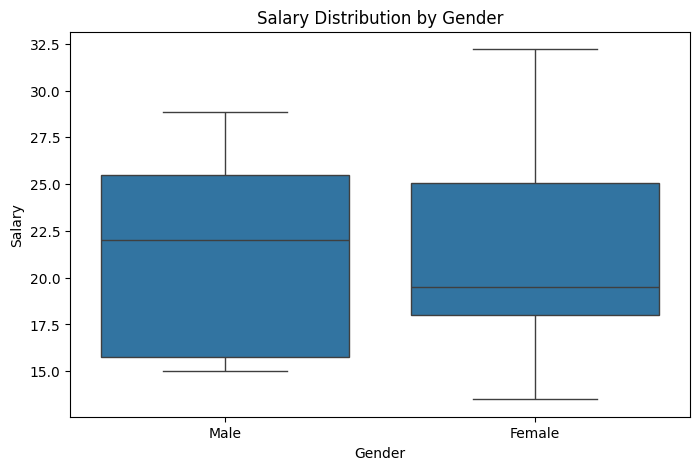

In [ ]:
# Salary by Gender

plt.figure(figsize=(8, 5))
sns.boxplot(data=worc_clean, x='Gender', y='Salary')
plt.title("Salary Distribution by Gender")
plt.show()


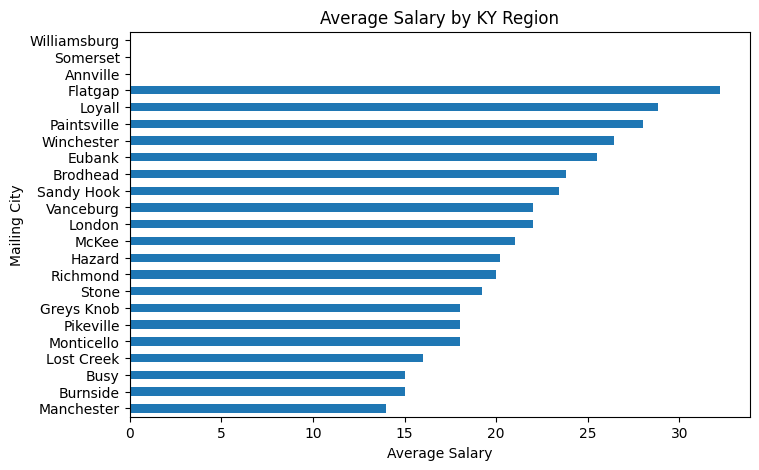

In [ ]:
# Average Salary by City
region_salary = worc_clean.groupby('Mailing City')['Salary'].mean().sort_values()
region_salary.plot(kind='barh', figsize=(8, 5), title="Average Salary by KY Region")
plt.xlabel("Average Salary")
plt.show()




## Blanks in Average Salary by KY Region
The following cities Williamsburg, Somerset, and Annville had blanks in the Salary column 

/var/folders/sw/mf1x4fnn1jg2jq5n72k6mkm80000gn/T/ipykernel_25780/1675383775.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  worc_clean.set_index('Start Date').resample('M').size().plot(kind='line', marker='o', figsize=(10, 4))


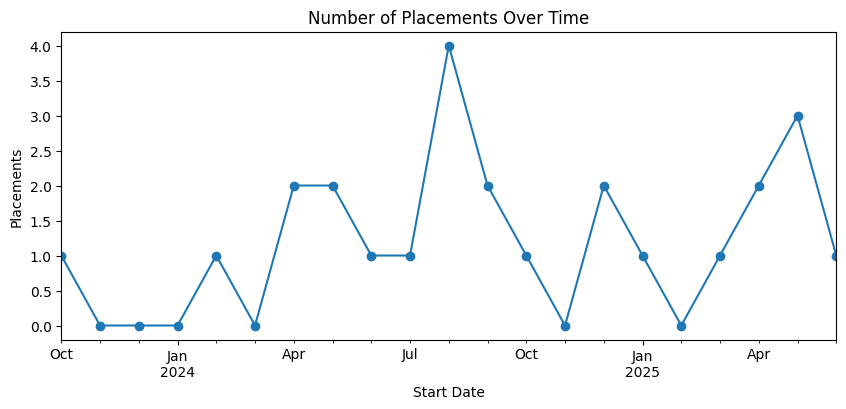

In [ ]:
# Placements over time
worc_clean.set_index('Start Date').resample('M').size().plot(kind='line', marker='o', figsize=(10, 4))
plt.title("Number of Placements Over Time")
plt.ylabel("Placements")
plt.show()

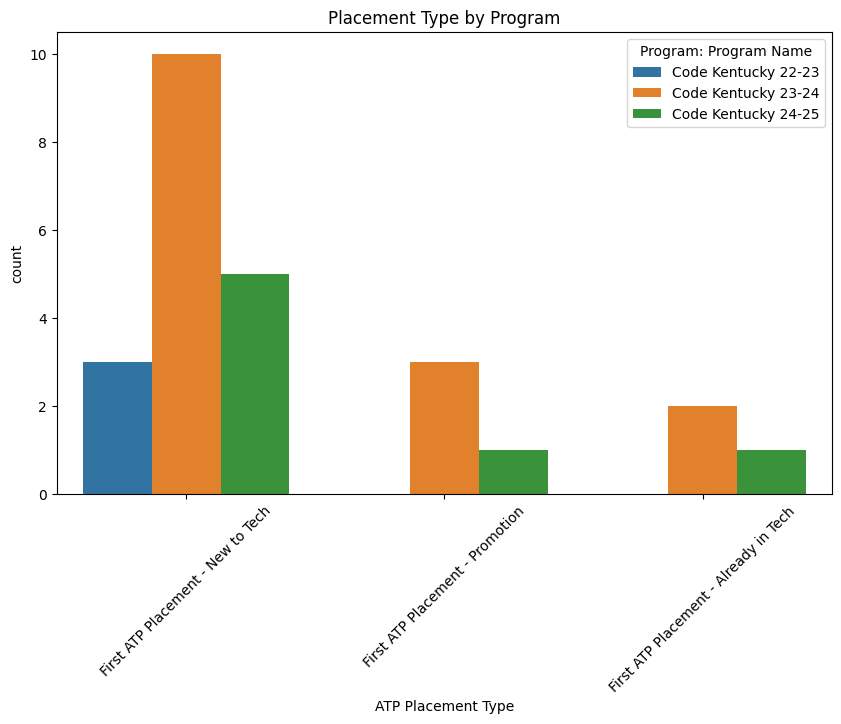

In [ ]:
# Count of placement type by region
plt.figure(figsize=(10, 6))
sns.countplot(data=worc_clean, x='ATP Placement Type', hue='Program: Program Name')
plt.xticks(rotation=45)
plt.title("Placement Type by Program")
plt.show()

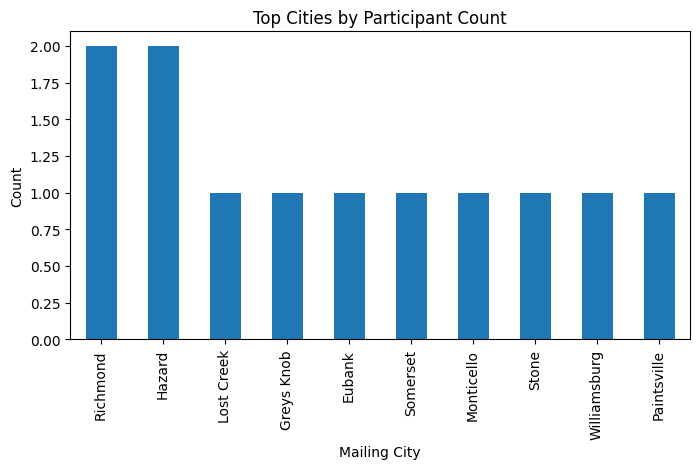

In [ ]:
# Count of Participants by City
city_counts = worc_clean['Mailing City'].value_counts().head(10)
city_counts.plot(kind='bar', title='Top Cities by Participant Count', figsize=(8, 4))
plt.ylabel("Count")
plt.show()

In [ ]:
worc_clean.to_excel("worc_employment_clean.xlsx", index=False)